![CDS 411 logo](../../img/cds-411-logo.png)

# Class 8: System dynamics models: Growth and decay II

---

![CC BY-SA 4.0 license](../../img/cc-by-sa.png)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

## Load packages

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Growth model for bacterial colony

Iteratively solve the difference equation using numerical methods

\begin{equation}
P(t)=P(t-\Delta{}t)+rP(t-\Delta{}t)\Delta{}t
\end{equation}

Assume the following constants:

```python
population = 100
r = 0.1
delta_t = 0.001
time_of_simulation = 50.5
```

## Class-led solution

### Algorithm

In [2]:
population = 100
r = 0.1
delta_t = 0.001
time_of_simulation = 50.5
trace = [[0, population]]

for time_step in range(1, int(time_of_simulation / delta_t) + 1):
    population = population + r * population * delta_t
    trace.append([time_step, population])

### Store results in DataFrame

In [3]:
bacteria_df = pd.DataFrame({
    "time_step": [time_step[0] for time_step in trace],
    "population": [time_step[1] for time_step in trace]
})
bacteria_df["time"] = bacteria_df["time_step"] * delta_t

### Plot results using matplotlib

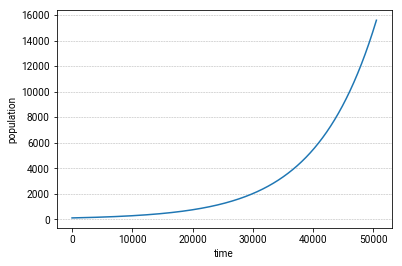

In [4]:
fig, ax = plt.subplots()  # Define an "axis" object for more control over plot
ax.plot(bacteria_df["time_step"], bacteria_df["population"]);
ax.set_xlabel("time")
ax.set_ylabel("population");

## Cleaning up our code

### Create a documented function

```python
def simulation(p0: float, growth_rate: float,
               time: float, delta_t: float) -> pd.DataFrame:
    """Simulate the population of a bacterial colony
    over time.
    
    :param p0: The initial population of the bacterial
        colony.
    :param growth_rate: The reproduction rate for the
        bacteria population.
    :param delta_t: The size of the time step interval.
    """
```

```python
    total_sim_steps = int(time / delta_t)
    population = p0
    trace = [[0, population]]
```

```python    
    for step_index in range(1, total_sim_steps + 1):
        population_change = growth_rate * population
        population += population_change * delta_t
        trace.append([step_index, population])
```

```python
    population_df = pd.DataFrame({
        "step_index": [x[0] for x in trace],
        "population": [x[1] for x in trace],
    })
    population_df["time"] = (
        population_df["step_index"] * delta_t)
    
    return population_df
```

### Functions for plotting

```python
def create_plot(x, y, label, style, xlabel="time",
                ylabel="population"):
    fig, ax = plt.subplots()
    ax.plot(x, y, style, label=label)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    return fig, ax
```

```python
def add_to_plot(ax, x, y, label, style):
    ax.plot(x, y, style, label=label)
```

### Save and import from external file

Saved these functions into `bacteria.py`. Import them for later use.

In [5]:
import bacteria

In [6]:
bacteria.simulation?

Signature: bacteria.simulation(p0:float, growth_rate:float, time:float, delta_t:float) -> pandas.core.frame.DataFrame
Docstring:
Simulate the population of a bacterial colony over time.

:param p0: The initial population of the bacterial colony.
:param growth_rate: The reproduction rate for the bacteria population.
:param delta_t: The size of the time step interval.
File:      ~/Teaching/CDS-411/semesters/2018_fall/repos/course-materials/class_notes/class09/bacteria.py
Type:      function


## Numerical error

### Exact solution versus numerical approximation

The differential equation,

\begin{equation}
\dfrac{dP}{dt} = rP
\end{equation}

can be solved exactly. The exact solution is $P(t)=P_{0}e^{rt}$, so in code we would have the following:

```python
def exact(p0, growth_rate, time, delta_t):
    time_array = np.arange(0, time, delta_t)
    population = p0 * np.exp(growth_rate * time_array)
    population_df = pd.DataFrame({
        "time": time_array,
        "population": population,
    })
    
    return population_df
```

How does the step size affect the computed population for the bacterial colony?

In [7]:
bacteria_sim = bacteria.simulation(p0=100, growth_rate=0.1, time=50, delta_t=1)
bacteria_exact = bacteria.exact(p0=100, growth_rate=0.1, time=50, delta_t=1)

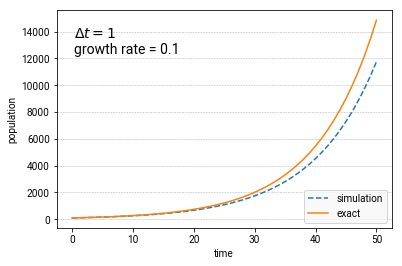

In [8]:
fig, ax = bacteria.create_plot(x=bacteria_sim["time"], y=bacteria_sim["population"],
                               label="simulation", style="--")
bacteria.add_to_plot(ax=ax, x=bacteria_exact["time"], y=bacteria_exact["population"],
                     label="exact", style="-")
ax.legend(loc="lower right");
ax.text(0.05, 0.8, "$\Delta{}t=1$\ngrowth rate = 0.1", fontsize=14,
        transform=ax.transAxes);

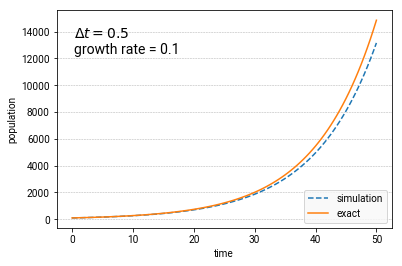

In [9]:
bacteria_sim = bacteria.simulation(p0=100, growth_rate=0.1, time=50, delta_t=0.5)
bacteria_exact = bacteria.exact(p0=100, growth_rate=0.1, time=50, delta_t=0.5)
fig, ax = bacteria.create_plot(x=bacteria_sim["time"], y=bacteria_sim["population"],
                               label="simulation", style="--")
bacteria.add_to_plot(ax=ax, x=bacteria_exact["time"], y=bacteria_exact["population"],
                     label="exact", style="-")
ax.legend(loc="lower right");
ax.text(0.05, 0.8, "$\Delta{}t=0.5$\ngrowth rate = 0.1", fontsize=14,
        transform=ax.transAxes);

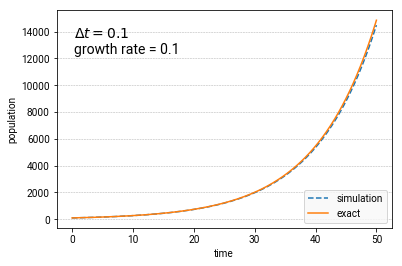

In [10]:
bacteria_sim = bacteria.simulation(p0=100, growth_rate=0.1, time=50, delta_t=0.1)
bacteria_exact = bacteria.exact(p0=100, growth_rate=0.1, time=50, delta_t=0.1)
fig, ax = bacteria.create_plot(x=bacteria_sim["time"], y=bacteria_sim["population"],
                               label="simulation", style="--")
bacteria.add_to_plot(ax=ax, x=bacteria_exact["time"], y=bacteria_exact["population"],
                     label="exact", style="-")
ax.legend(loc="lower right");
ax.text(0.05, 0.8, "$\Delta{}t=0.1$\ngrowth rate = 0.1", fontsize=14,
        transform=ax.transAxes);

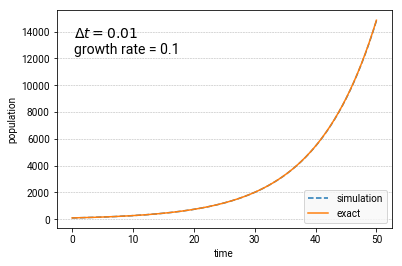

In [11]:
bacteria_sim = bacteria.simulation(p0=100, growth_rate=0.1, time=50, delta_t=0.01)
bacteria_exact = bacteria.exact(p0=100, growth_rate=0.1, time=50, delta_t=0.01)
fig, ax = bacteria.create_plot(x=bacteria_sim["time"], y=bacteria_sim["population"],
                               label="simulation", style="--")
bacteria.add_to_plot(ax=ax, x=bacteria_exact["time"], y=bacteria_exact["population"],
                     label="exact", style="-")
ax.legend(loc="lower right");
ax.text(0.05, 0.8, "$\Delta{}t=0.01$\ngrowth rate = 0.1", fontsize=14,
        transform=ax.transAxes);

## Quantifying error

### Global truncation error

\begin{equation}
E_{n}=P_{\text{exact}}\left(t_{n}\right)-P_{\text{approx}}\left(t_{n}\right)
\end{equation}

### Local truncation error

\begin{equation}
e_{n+1}=P_{\text{exact}}\left(t_{n+1}\right)-P_{\text{approx}}\left(t_{n+1}\right)=\dfrac{1}{2}\left.\dfrac{d^{2}P(t)}{dt^{2}}\right\rvert_{t=\bar{t}_{n}}\Delta{}t^{2}
\end{equation}


### Relative percent error

In [12]:
relative_time_step_errors = []
for time_step in [1, 0.5, 0.1, 0.01]:
    bacteria_sim = bacteria.simulation(p0=100, growth_rate=0.1, time=50, delta_t=time_step)
    bacteria_exact = bacteria.exact(p0=100, growth_rate=0.1, time=50, delta_t=time_step)
    relative_percent_error = np.abs(bacteria_sim["population"] - bacteria_exact["population"]) * 100 / bacteria_sim["population"]
    relative_time_step_errors.append([50, time_step, relative_percent_error.tail(1).values[0]])
   

In [13]:
errors_df = pd.DataFrame({"time step size": [value[1] for value in relative_time_step_errors],
                          "relative error": [value[2] for value in relative_time_step_errors]})

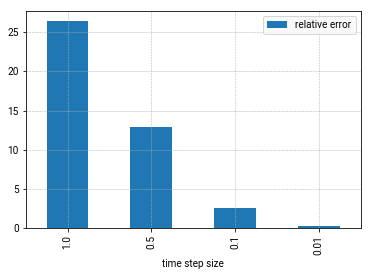

In [14]:
errors_df.plot(x="time step size", kind="bar");

## Unconstrained decay

### Model of Carbon-14 decay

The rate of change of the mass of a radioactive substance is proportional to the mass of the substance, and the constant of proportionality is negative.

Carbon-14, for example, has a constant of proportionality of $r=-0.000120968$.

What would the system dynamics diagram look like?

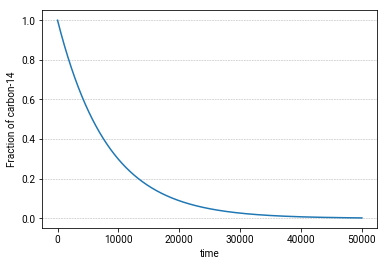

In [15]:
carbon_decay = bacteria.simulation(1.00, -0.000120968, 50000, 0.1)
fig, ax = bacteria.create_plot(
    x=carbon_decay["time"], y=carbon_decay["population"], label="carbon-14",
    style="-", ylabel="Fraction of carbon-14")

### Half-life

The constant of proportionality is related to the concept of the half-life as follows

\begin{equation}
t_{1/2}=-\dfrac{\ln(2)}{r}
\end{equation}

In [16]:
print(f"Carbon-14 half-life = {-np.log(2)/(-0.000120968):.0f} years")

Carbon-14 half-life = 5730 years


## Constrained growth

### Revise the model we have

Add a carrying capacity to the model.

Revise the system dynamics diagram.

### Revised growth rate formula

\begin{equation}
\dfrac{dP}{dt}=r\left(1-\dfrac{P}{M}\right)P
\end{equation}

### Revised code

In [17]:
def constrained_growth_model(p0, growth_rate, M, time, delta_t):
    total_sim_steps = int(time / delta_t)
    population = p0
    trace = [[0, population]]
    
    for step_index in range(1, total_sim_steps + 1):
        population_change = growth_rate * (1 - population / M) * population
        population += population_change * delta_t
        trace.append([step_index, population])

    population_df = pd.DataFrame({
        "step_index": [x[0] for x in trace],
        "population": [x[1] for x in trace],
    })
    population_df["time"] = population_df["step_index"] * delta_t
    
    return population_df

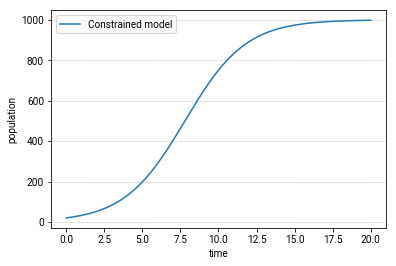

In [18]:
constrained_model = constrained_growth_model(p0=20, growth_rate=0.5, M=1000, time=20, delta_t=0.01)
fig, ax = bacteria.create_plot(x=constrained_model["time"], y=constrained_model["population"],
                               label="Constrained model", style="-")
ax.legend(loc="best");

### Population above the carrying capacity

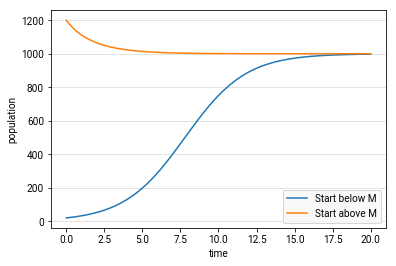

In [19]:
constrained_model = constrained_growth_model(p0=20, growth_rate=0.5, M=1000, time=20, delta_t=0.01)
constrained_model2 = constrained_growth_model(p0=1200, growth_rate=0.5, M=1000, time=20, delta_t=0.01)
fig, ax = bacteria.create_plot(x=constrained_model["time"], y=constrained_model["population"],
                               label="Start below M", style="-")
bacteria.add_to_plot(ax=ax, x=constrained_model2["time"], y=constrained_model2["population"],
                     label="Start above M", style="-")
ax.legend(loc="lower right");